In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\3066041308.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv(r".\vijay_cleaned.csv",index_col=False).iloc[:,1:]

df

,marketingStatusSimplifiedCd,hasImage,statusText,beds,baths,area,sgapt,has3DModel,hasAdditionalAttributions,latitude,longitude,city,state,homeType,rentZestimate,price
0,Non Owner Occupied,True,Sold,3.0,2.0,1224.0,Unknown Listed By,False,True,42.293304,-71.133570,Roslindale,MA,SINGLE_FAMILY,3999.0,819500.0
1,RecentChange,True,Sold,1.0,1.0,723.0,Unknown Listed By,False,True,42.344826,-71.074990,Boston,MA,CONDO,3634.0,880000.0
2,RecentChange,True,Sold,6.0,3.0,3396.0,Unknown Listed By,False,True,42.315850,-71.061130,Dorchester,MA,MULTI_FAMILY,6000.0,1250000.0
3,RecentChange,True,Sold,4.0,3.0,2400.0,Unknown Listed By,False,True,42.298183,-71.078870,Dorchester,MA,MULTI_FAMILY,4964.0,805000.0
4,RecentChange,True,Sold,9.0,3.0,4107.0,RecentChange,False,True,42.300050,-71.083694,Dorchester,MA,MULTI_FAMILY,8970.0,650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,RecentChange,True,Sold,5.0,4.0,2366.0,Unknown Listed By,False,True,38.963560,-77.016990,Washington,DC,SINGLE_FAMILY,4999.0,1125000.0
6202,RecentChange,True,Sold,3.0,3.0,1802.0,Unknown Listed By,False,True,38.952750,-77.009360,Washington,DC,TOWNHOUSE,3449.0,465000.0
6203,RecentChange,True,Sold,4.0,4.0,2875.0,RecentChange,False,True,38.928920,-76.992680,Washington,DC,SINGLE_FAMILY,4749.0,1020000.0
6204,Non Owner Occupied,False,Sold,4.0,2.5,1260.0,Unknown Listed By,False,False,38.894318,-76.981830,Washington,DC,SINGLE_FAMILY,3994.0,550000.0


In [3]:
df.dtypes.value_counts()

float64    7
object     6
bool       3
Name: count, dtype: int64

In [4]:
df.columns==df.dtypes

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [5]:
boolCols=df.dtypes[df.dtypes=="bool"].index
for col in boolCols:
    df[col]=df[col].apply(lambda x: "true" if x==True else "false" )

df[boolCols]

,hasImage,has3DModel,hasAdditionalAttributions
0,true,false,true
1,true,false,true
2,true,false,true
3,true,false,true
4,true,false,true
...,...,...,...
6201,true,false,true
6202,true,false,true
6203,true,false,true
6204,false,false,false


In [6]:
catCols=df.drop(columns=["price"]).dtypes[(df.dtypes=="object") | (df.dtypes=="bool")].index
numCols=df.drop(columns=["price"]).dtypes[df.dtypes=="float64"].index

print("Categorical columns:")
print(list(catCols))
print("Numerical columns:")
print(list(numCols))

Categorical columns:
['marketingStatusSimplifiedCd', 'hasImage', 'statusText', 'sgapt', 'has3DModel', 'hasAdditionalAttributions', 'city', 'state', 'homeType']
Numerical columns:
['beds', 'baths', 'area', 'latitude', 'longitude', 'rentZestimate']


In [7]:
les_propor_cities=df["city"].value_counts()[(((df["city"].value_counts()/df["city"].shape[0])*100)<1)].index
df["city"]=df["city"].apply(lambda city:city if city not in les_propor_cities else "Others")
df["city"].value_counts()

city
Others           1077
Denver            486
Indianapolis      485
San Jose          471
Philadelphia      469
Charlotte         458
Phoenix           402
San Diego         368
Washington        358
Seattle           347
San Francisco     346
Nashville         324
Chicago           264
Los Angeles       183
Tampa              88
Boston             80
Name: count, dtype: int64

In [8]:
priceWithoutMax10Indices=df["price"].sort_values(ascending=False).head(10).index
df.drop(priceWithoutMax10Indices,inplace=True)

-Univariate analysis for categorical data



C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\993764420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=(df[col].value_counts() / df.shape[0]) * 100, y=df[col].value_counts().index, palette='viridis', ax=ax)


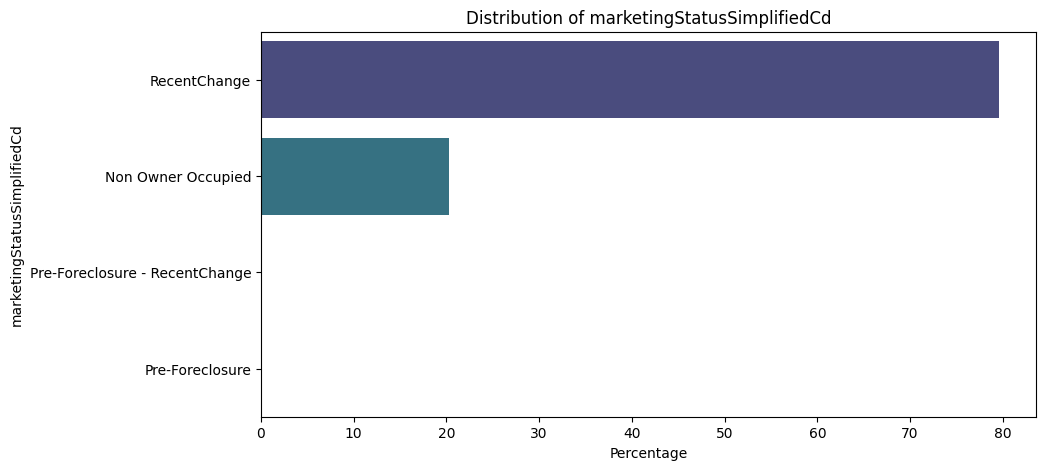

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\993764420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=(df[col].value_counts() / df.shape[0]) * 100, y=df[col].value_counts().index, palette='viridis', ax=ax)


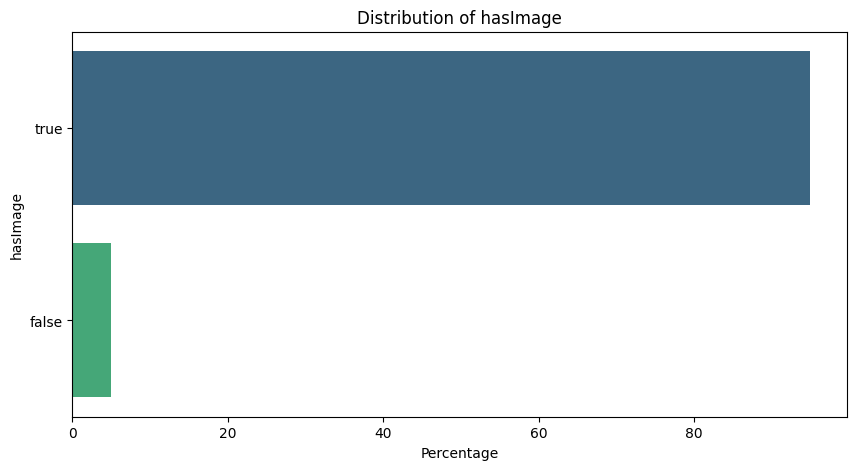

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\993764420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=(df[col].value_counts() / df.shape[0]) * 100, y=df[col].value_counts().index, palette='viridis', ax=ax)


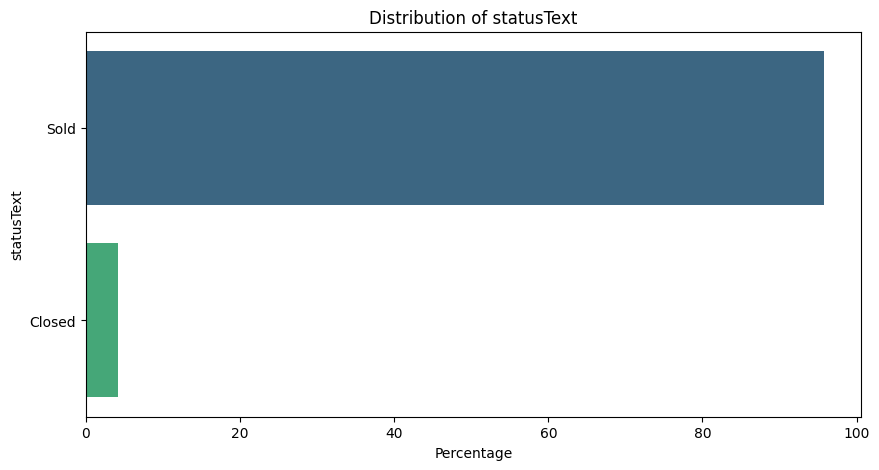

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\993764420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=(df[col].value_counts() / df.shape[0]) * 100, y=df[col].value_counts().index, palette='viridis', ax=ax)


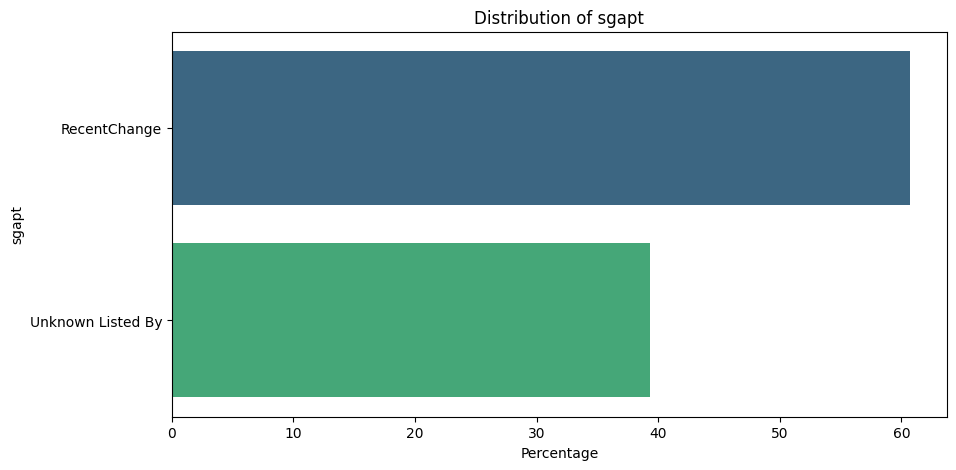

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\993764420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=(df[col].value_counts() / df.shape[0]) * 100, y=df[col].value_counts().index, palette='viridis', ax=ax)


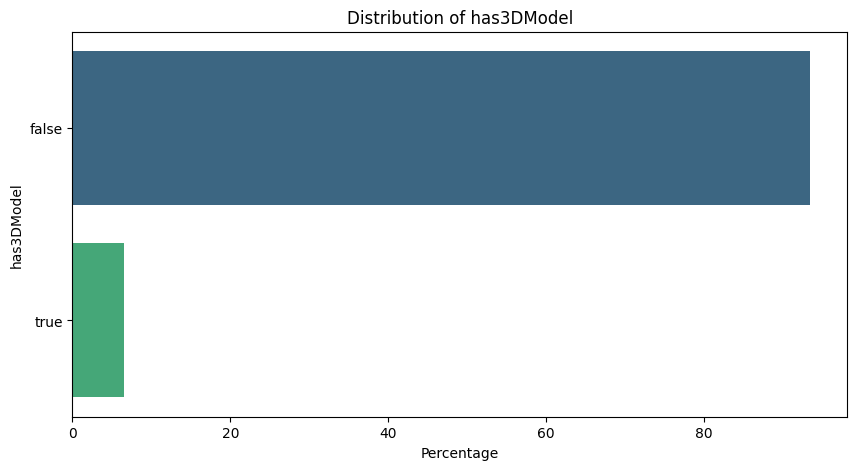

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\993764420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=(df[col].value_counts() / df.shape[0]) * 100, y=df[col].value_counts().index, palette='viridis', ax=ax)


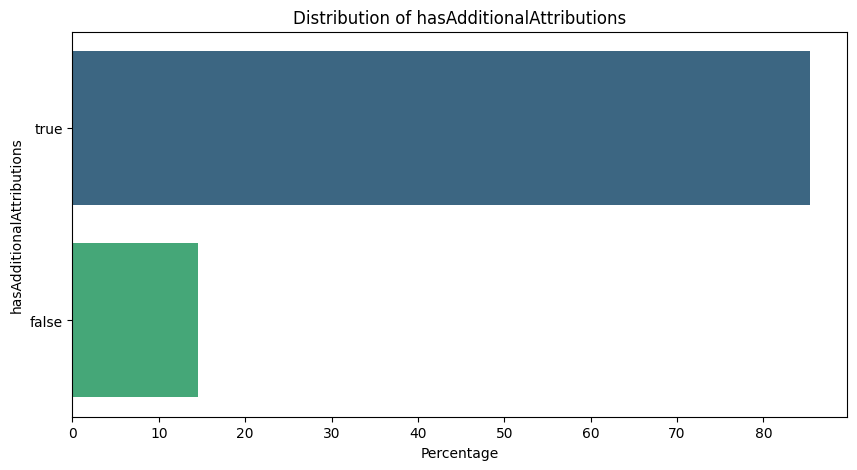

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\993764420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=(df[col].value_counts() / df.shape[0]) * 100, y=df[col].value_counts().index, palette='viridis', ax=ax)


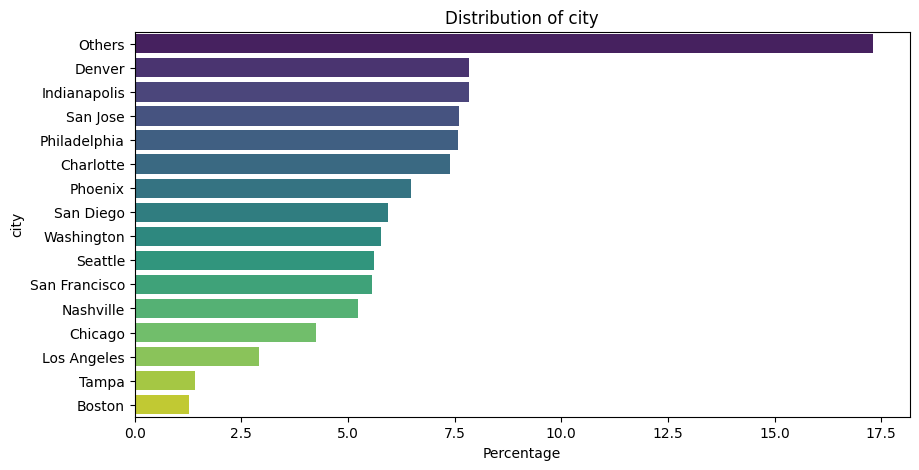

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\993764420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=(df[col].value_counts() / df.shape[0]) * 100, y=df[col].value_counts().index, palette='viridis', ax=ax)


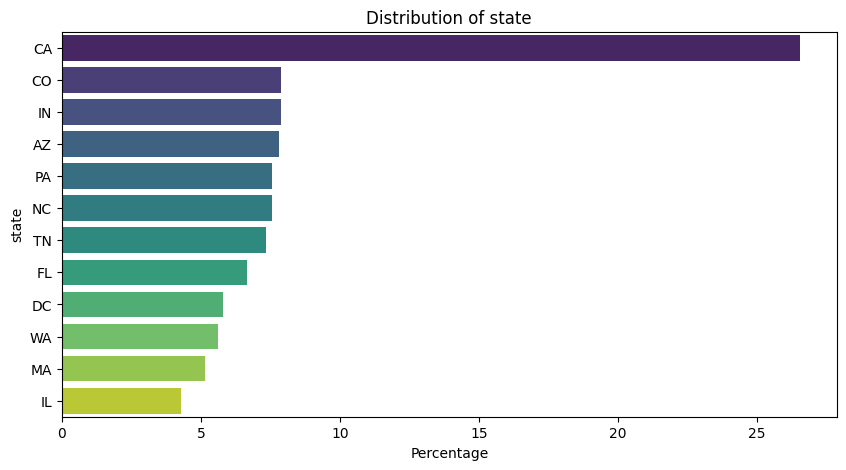

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\993764420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=(df[col].value_counts() / df.shape[0]) * 100, y=df[col].value_counts().index, palette='viridis', ax=ax)


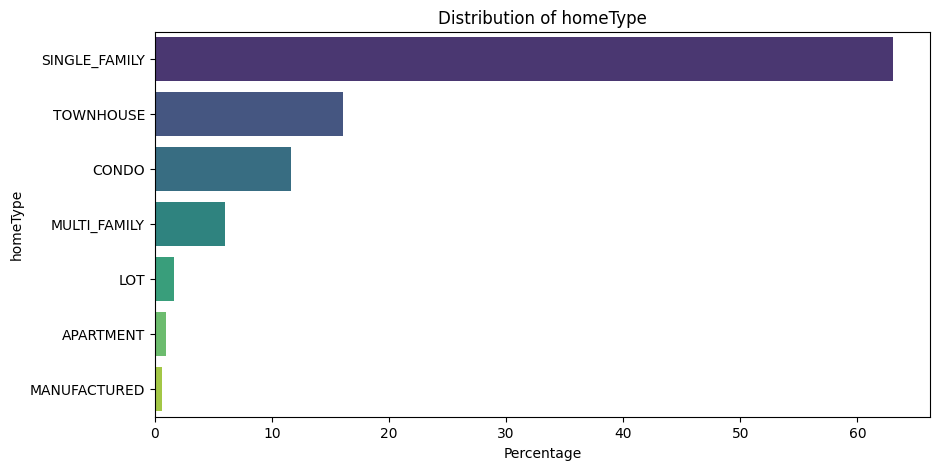

In [9]:
for col in catCols:
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.barplot(x=(df[col].value_counts() / df.shape[0]) * 100, y=df[col].value_counts().index, palette='viridis', ax=ax)
    ax.set_xlabel('Percentage')
    ax.set_ylabel(col)
    ax.set_title(f'Distribution of {col}')
    
    plt.show()

# Inference from univariate analysis
- Maximum houses from our data are either recently changed or Non owner occupied.
- Very little percentage of houses doesn't include Images in their listing.
- Most houses doesnt have 3D models
- Denver,Indianapolis and San Jose contains the highest houses listing.
- We clubbed together all the cities which has less than 1 percentage distribution and we call them "Others".
- California has highest amount of house listings by far.
- Single Family type houses are the most listed house types.


# Univariate analysis for Numerical data

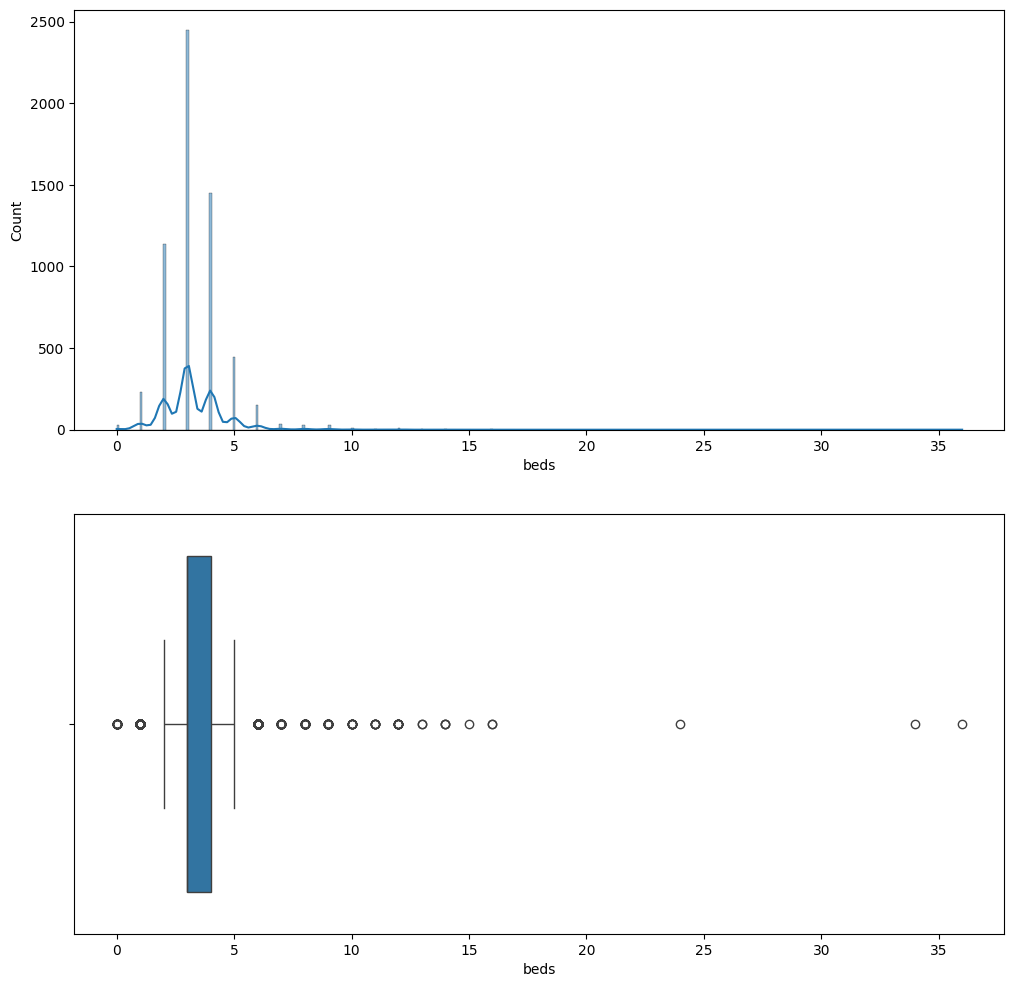

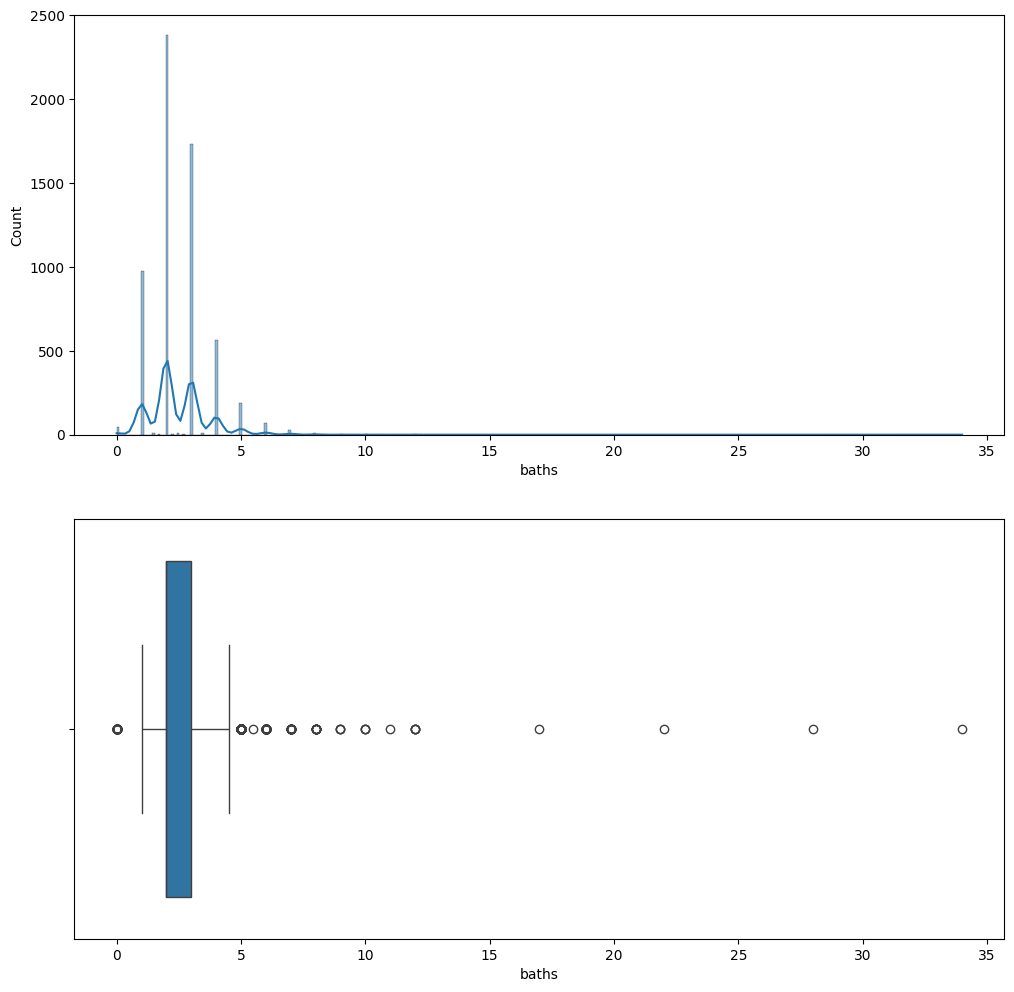

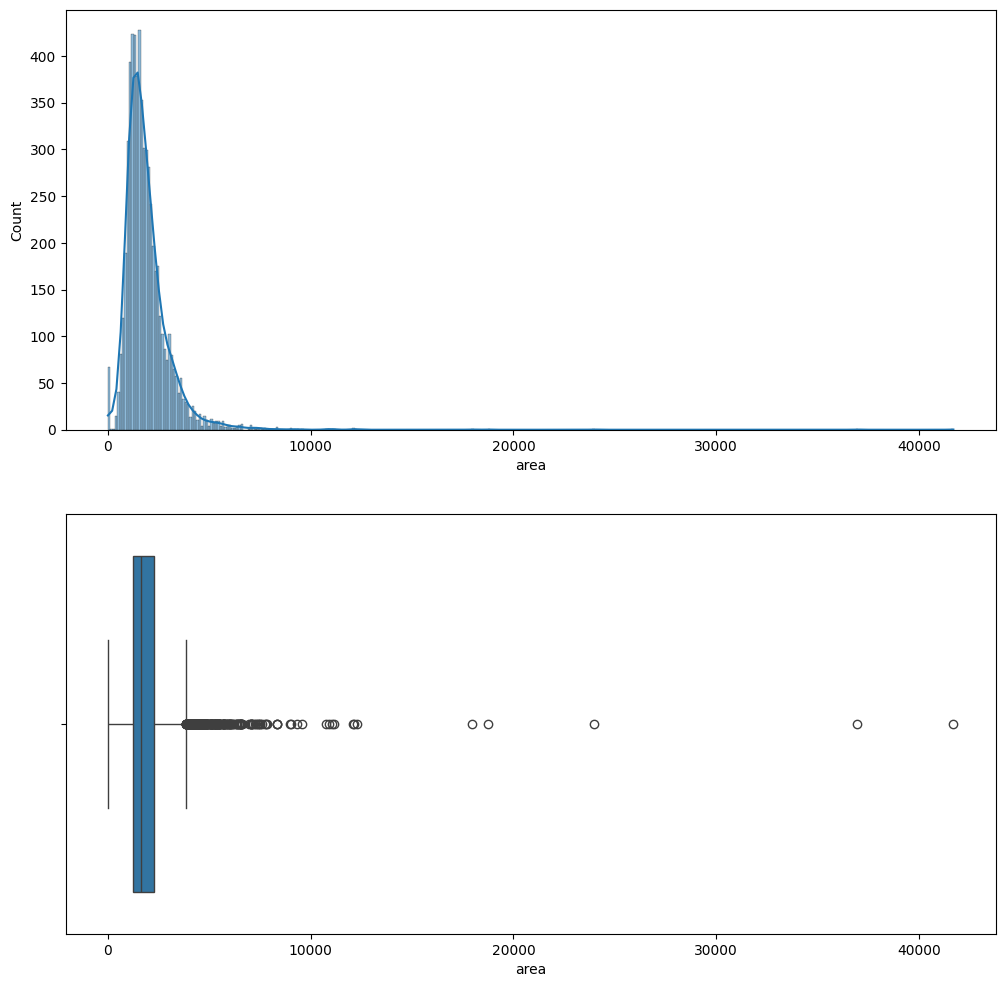

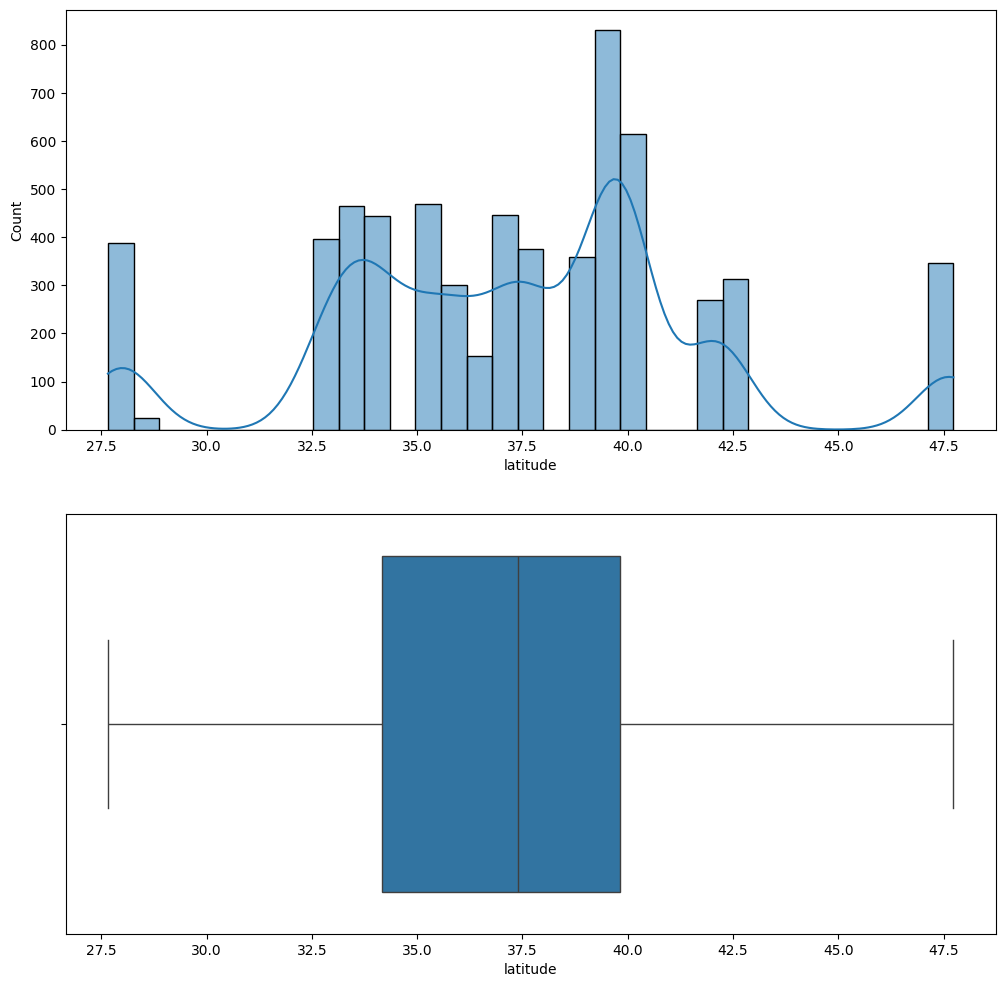

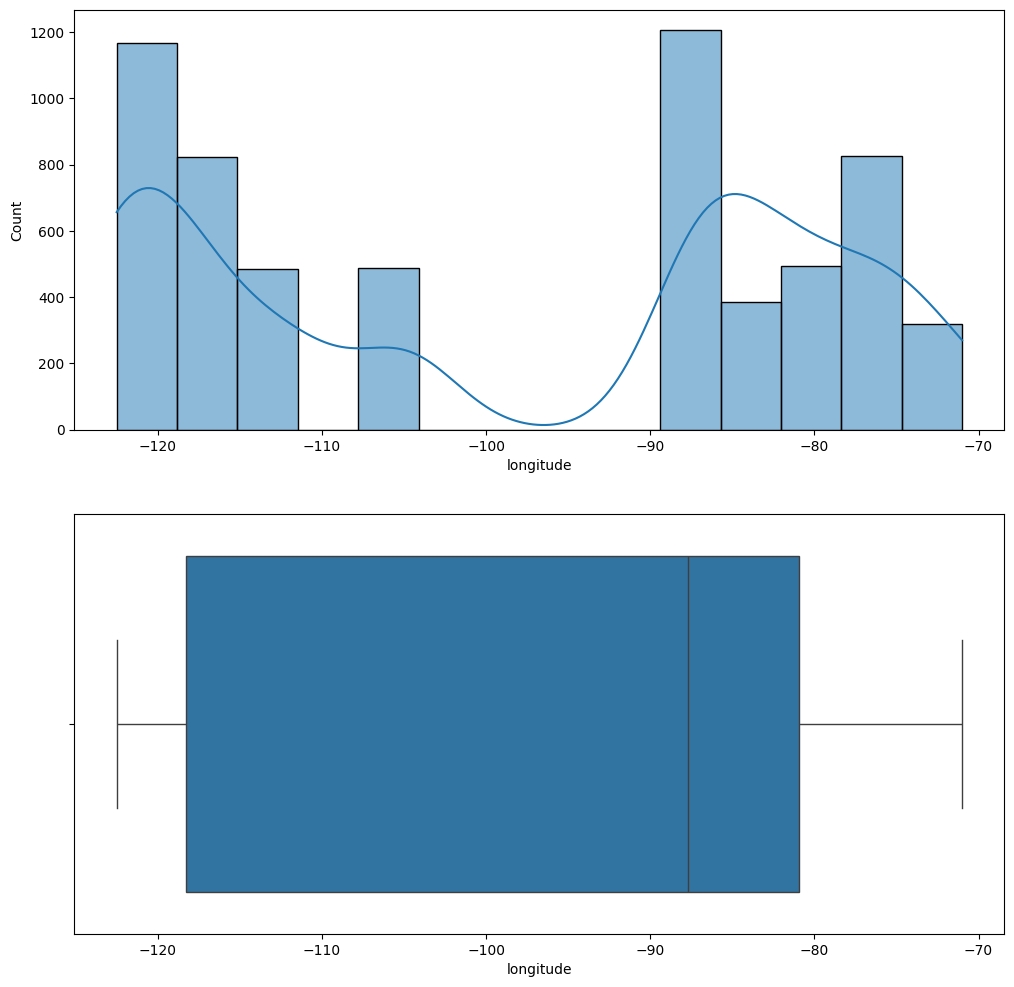

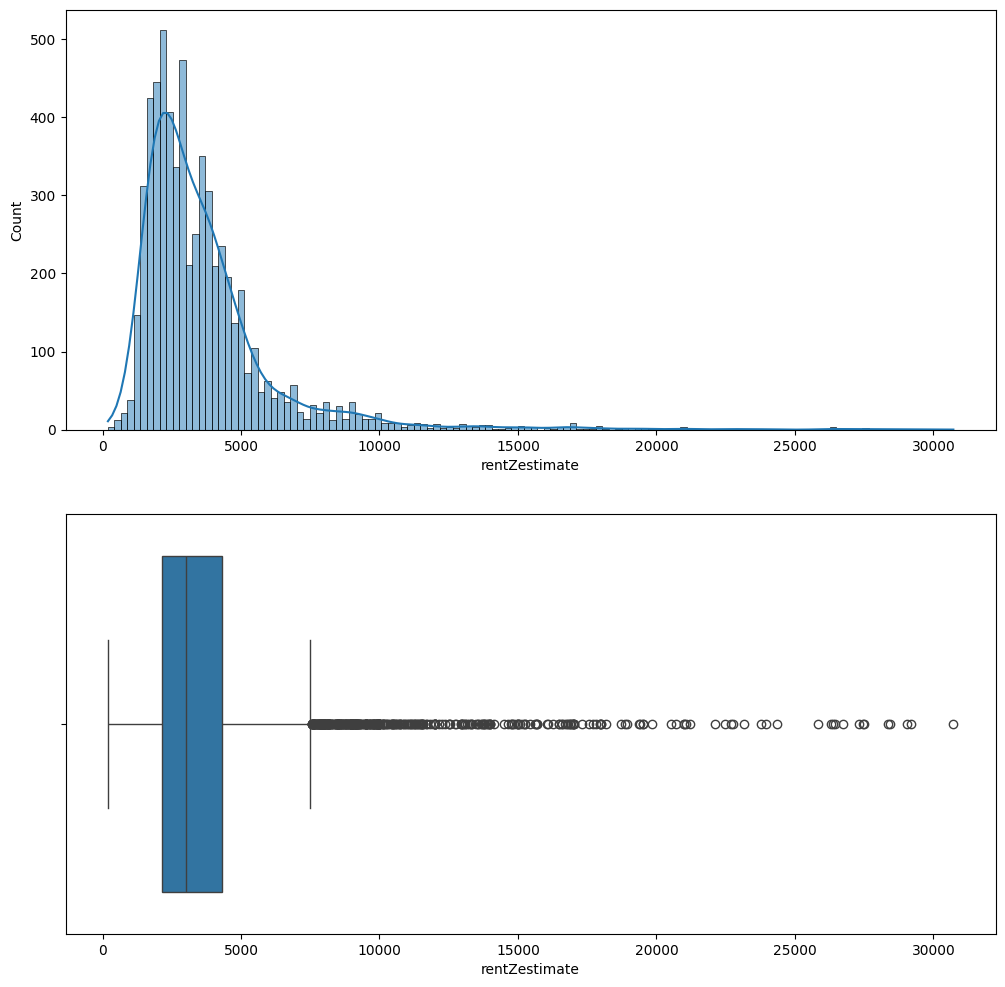

In [10]:
for col in numCols:
    fig,ax=plt.subplots(2,1,figsize=(12,12))
    sns.histplot(data=df,x=col,kde=True,ax=ax[0])
    sns.boxplot(data=df,x=col,ax=ax[1])

Bivariate analysis

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\2414266067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='price', ax=ax, palette='husl')


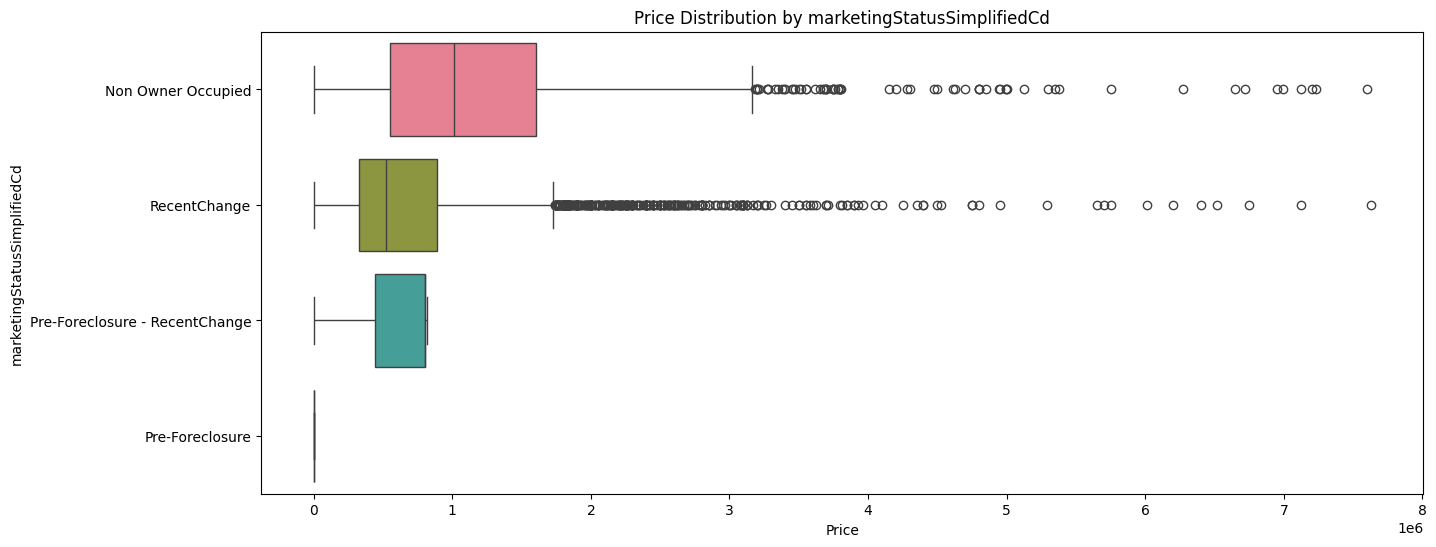

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\2414266067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='price', ax=ax, palette='husl')


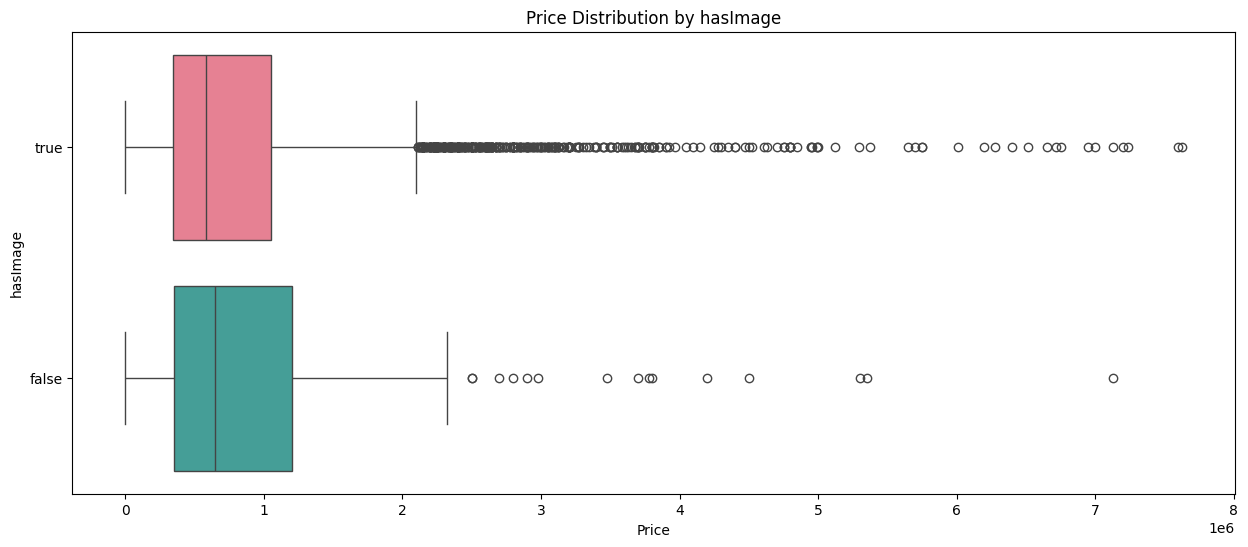

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\2414266067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='price', ax=ax, palette='husl')


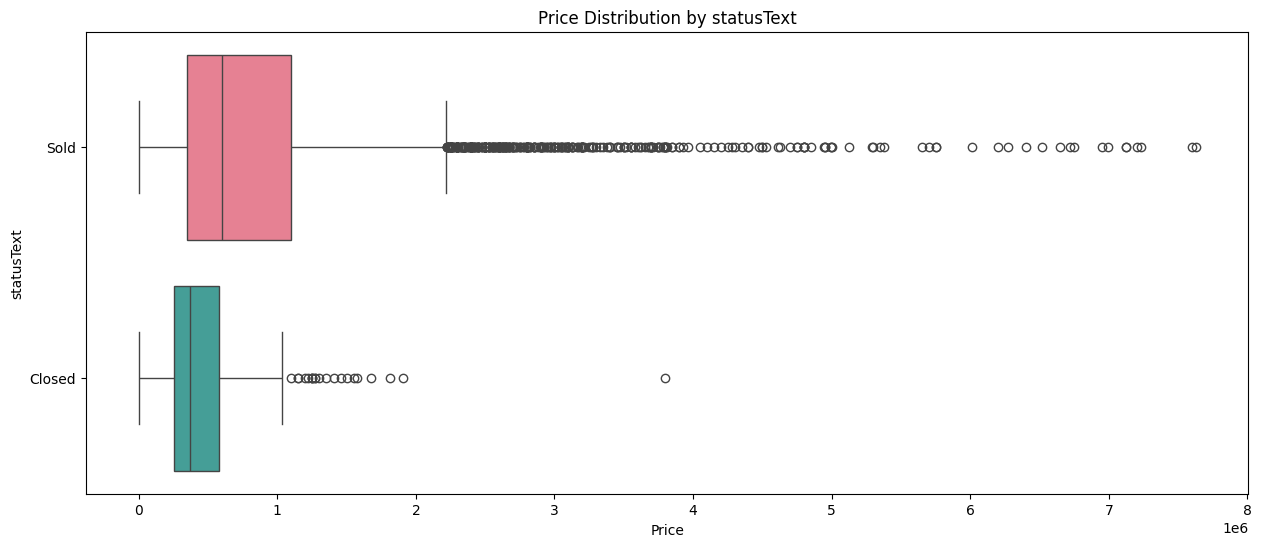

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\2414266067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='price', ax=ax, palette='husl')


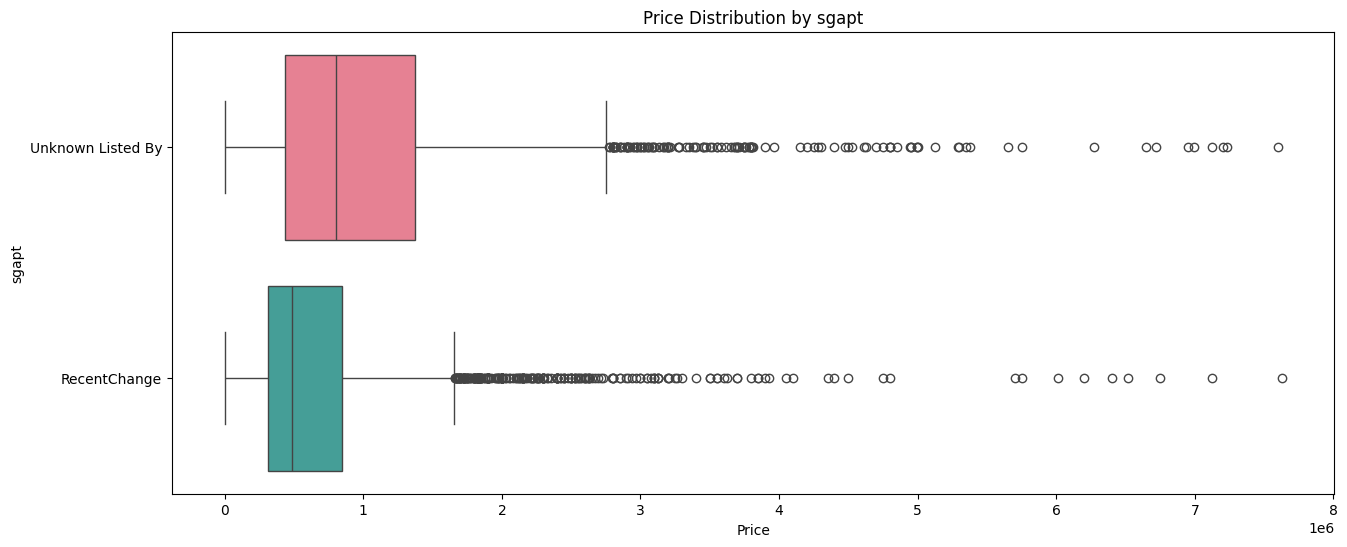

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\2414266067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='price', ax=ax, palette='husl')


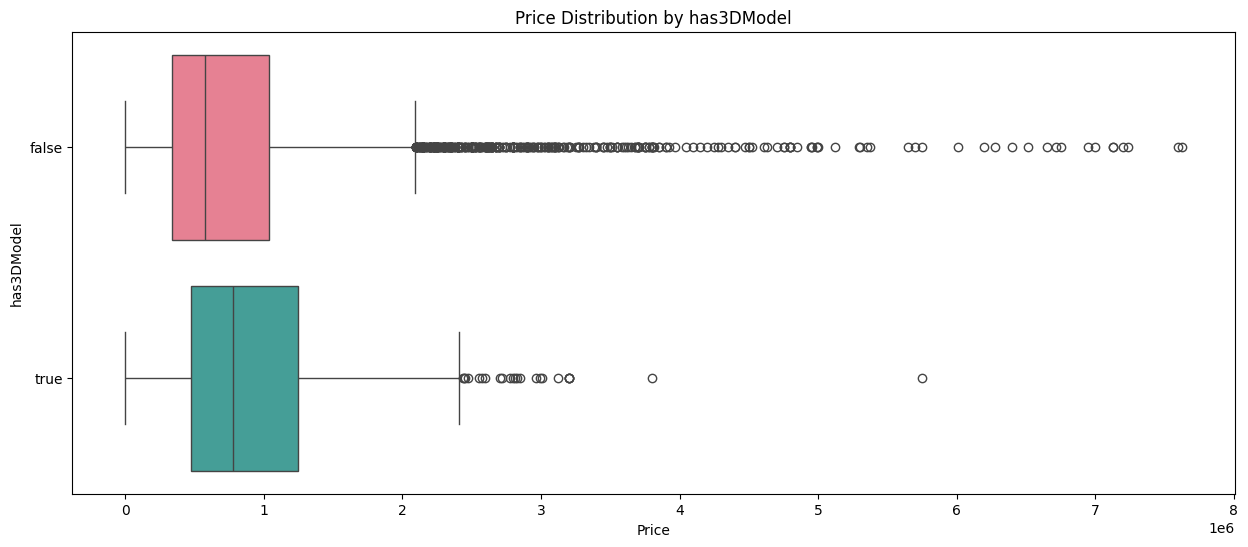

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\2414266067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='price', ax=ax, palette='husl')


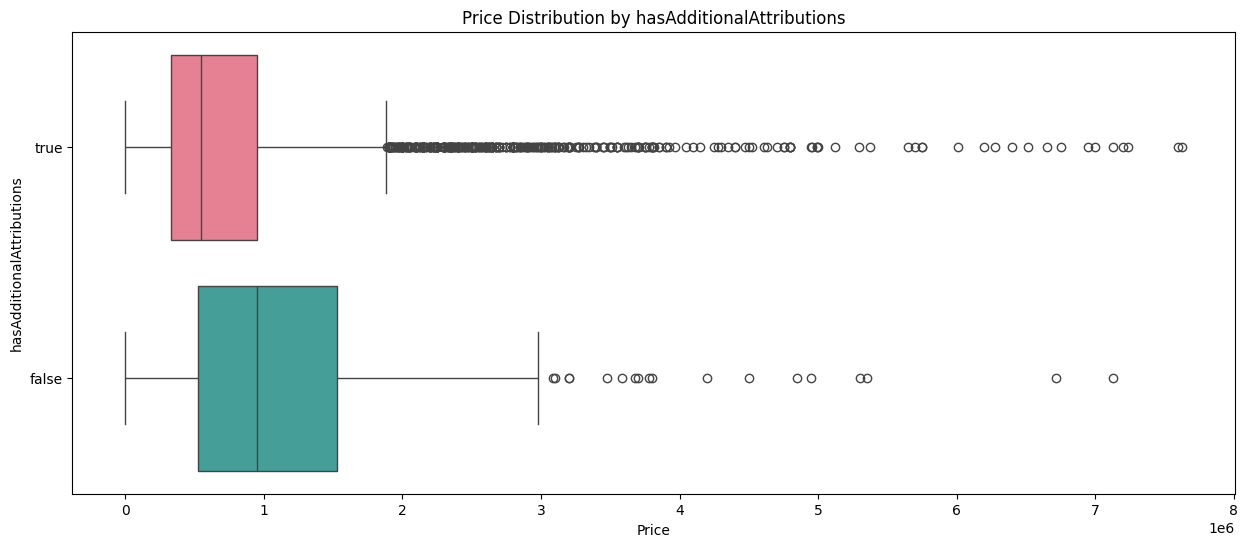

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\2414266067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='price', ax=ax, palette='husl')


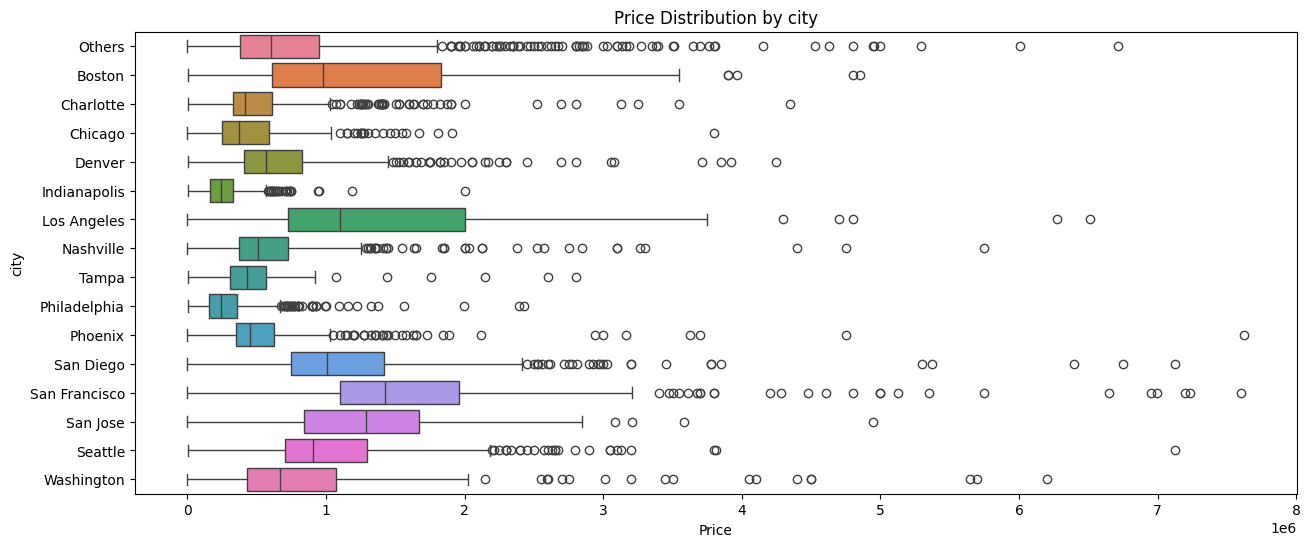

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\2414266067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='price', ax=ax, palette='husl')


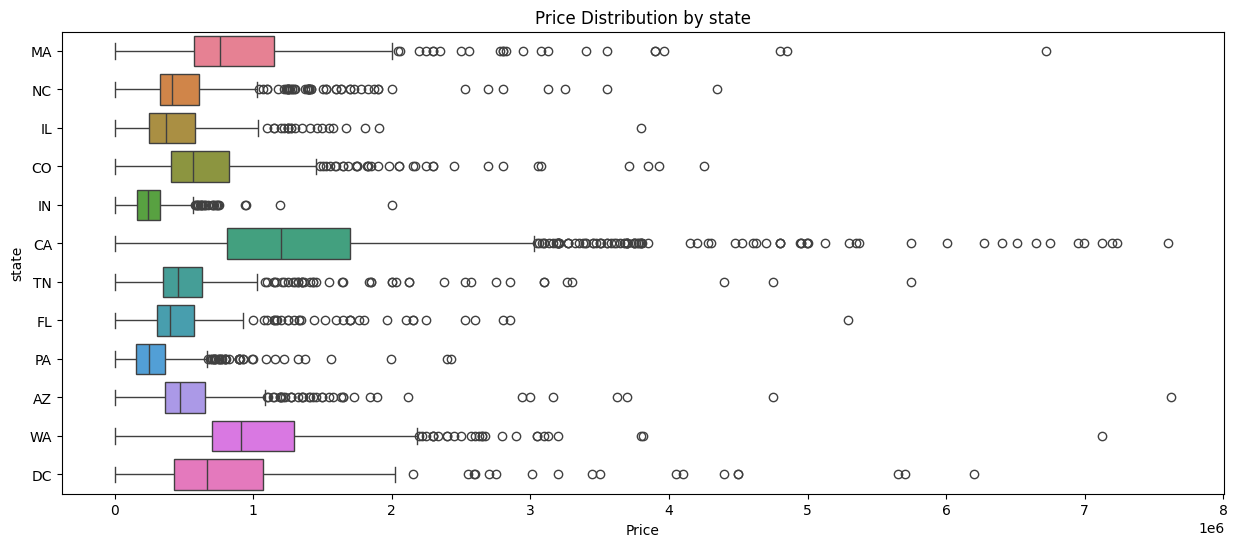

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\2414266067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='price', ax=ax, palette='husl')


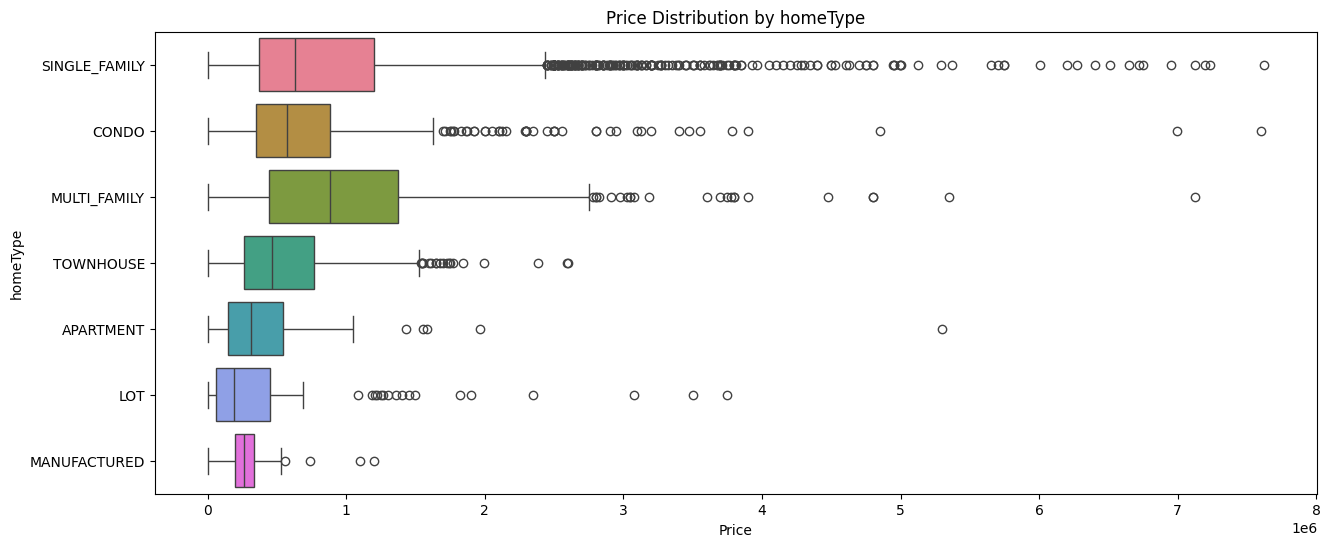

In [11]:
for col in catCols:
    fig, ax = plt.subplots(1, 1, figsize=(15, 6))
    sns.boxplot(data=df, y=col, x='price', ax=ax, palette='husl')
    ax.set_xlabel('Price')
    ax.set_ylabel(col)
    ax.set_title(f'Price Distribution by {col}')
    plt.show()

# Inference from Bivariate Analysis for Categirical data
- The Non Owner Occupied houses have higher average price.

- The houses without images surprisingly have large price distribution, but the price average for houses with or without images are almost same.

- The houses with 3D models have higher average price. Premium houses have 3D models.

- According to our graph, having Additional attributions does'nt necessarily mean for higher prices.

- Los Angeles and Boston have the widest distribution of prices,meaning houses of these two cities have the biggest price range(ranging from 0.5M to over 2M).

- Meanwhile San Francisco have the highest average price, implying houses in San Fracisco are generally costlier than in other cities.

- Philadelphia and Indianapolis have the cheapest houses among the cities.

- California has the widest price distribution and has the highest price average.

- Houses in Pennsylvania are the cheapest among the states.

- Multi Family has the widest price distribution and has the highest price average.

- Lots and Manufactured houses are generally cheap compared to others.


Bivariate for Numerical data

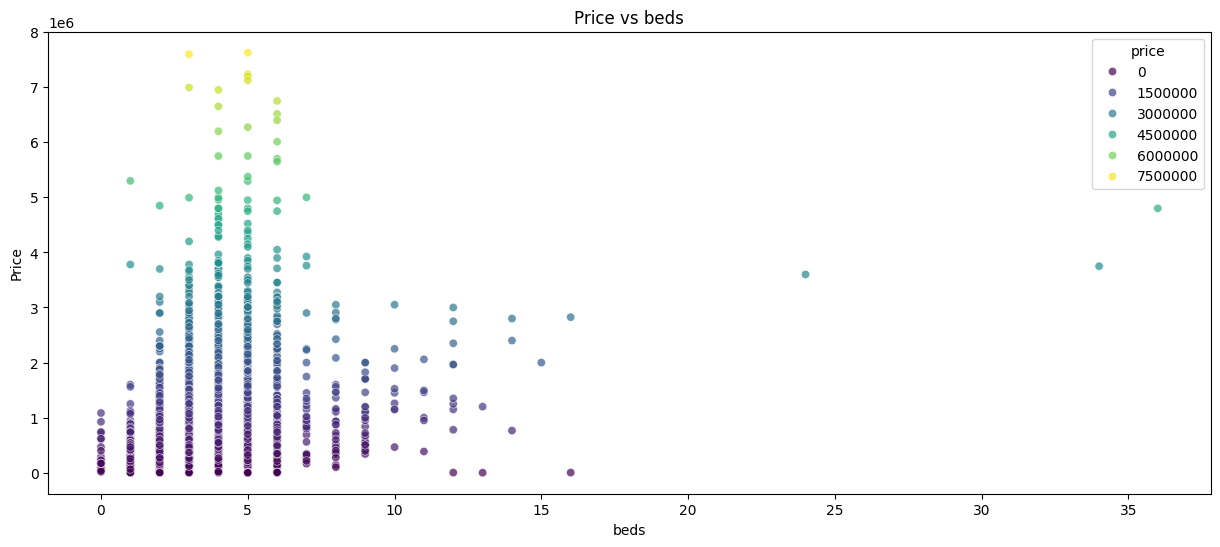

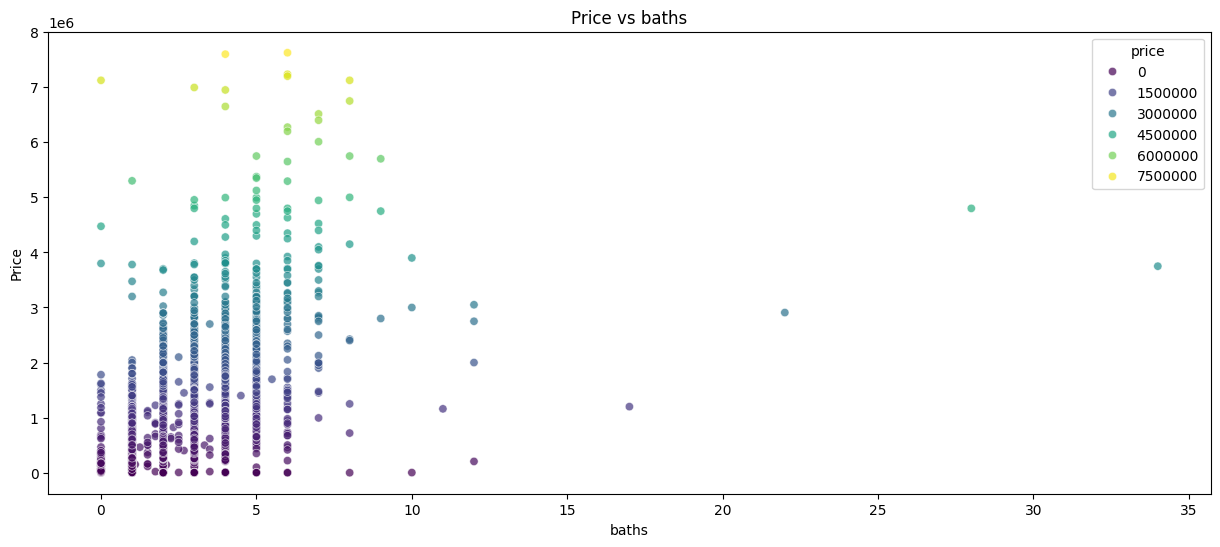

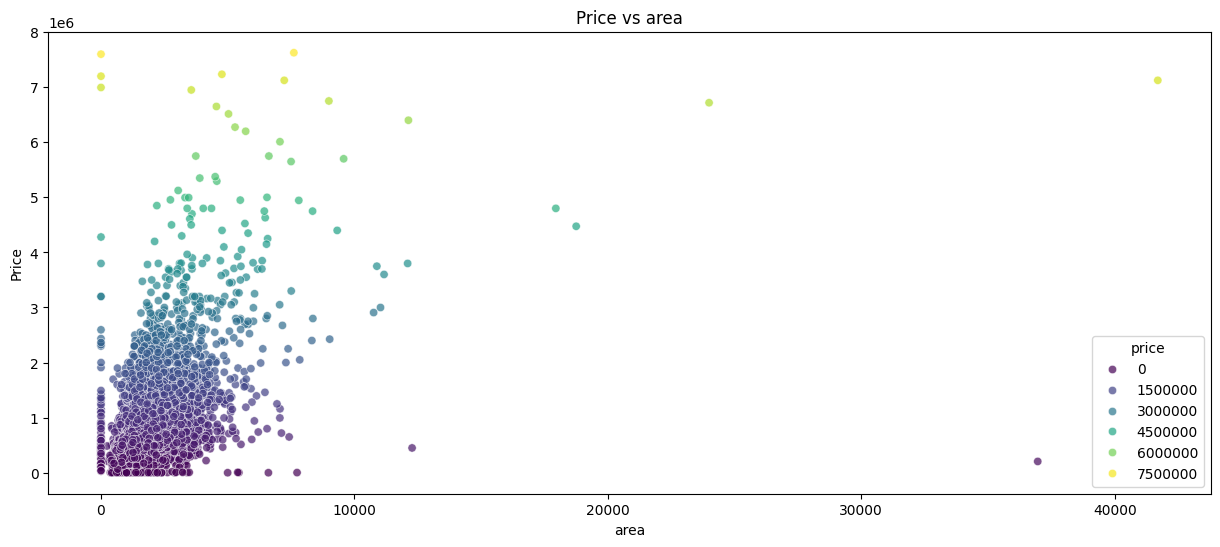

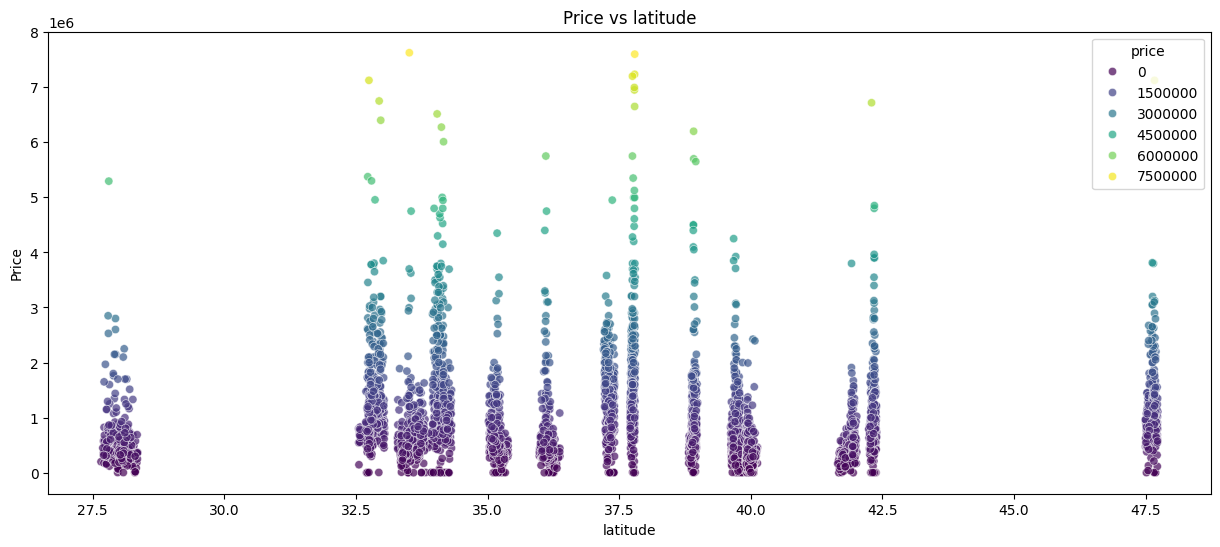

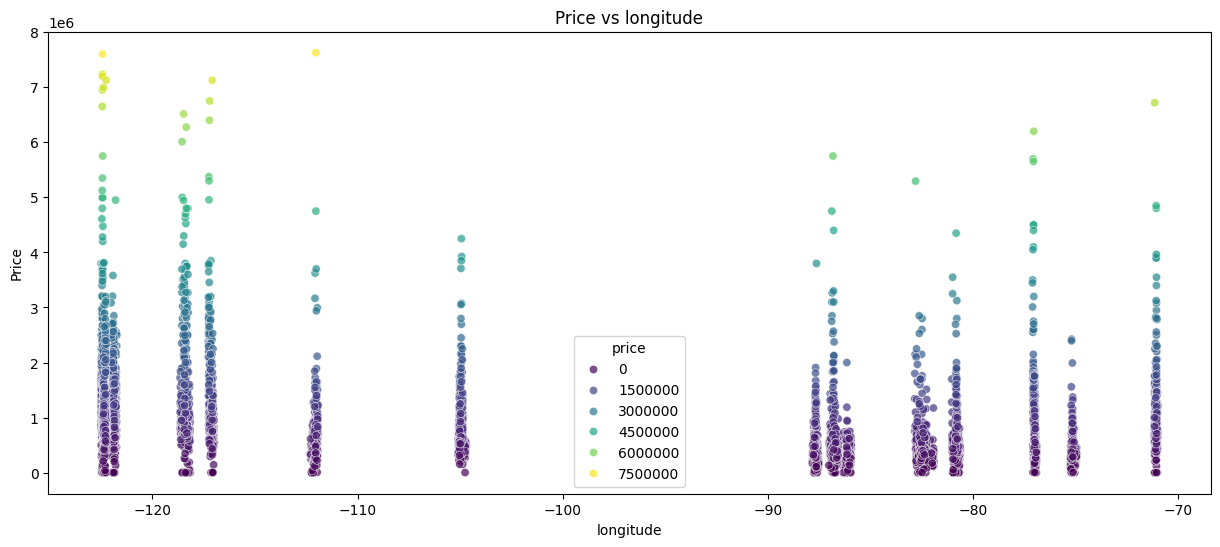

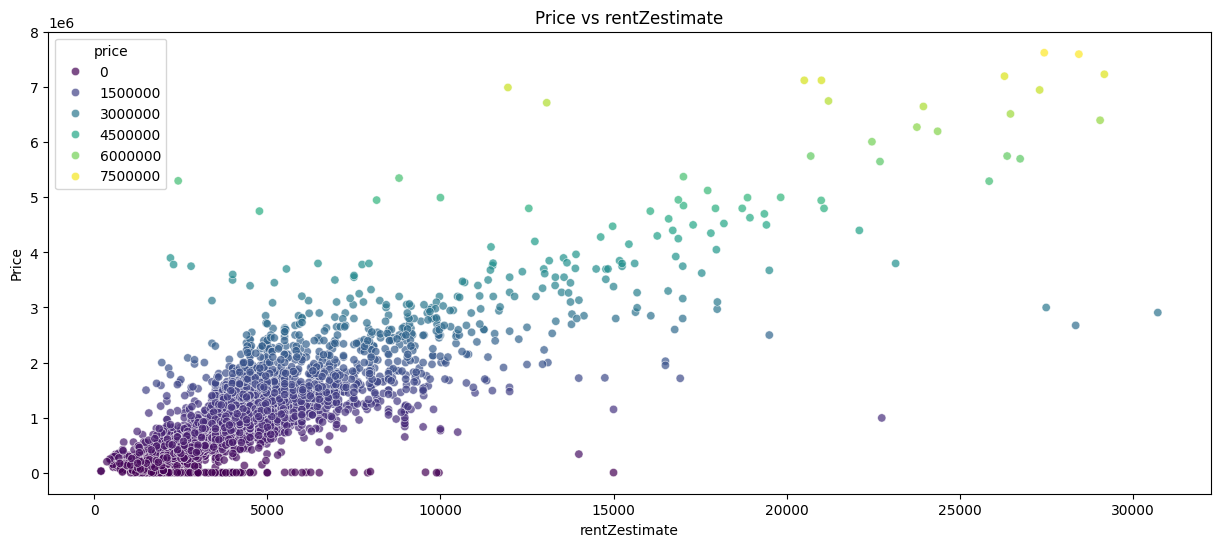

In [12]:
for col in numCols:
    fig, ax = plt.subplots(1, 1, figsize=(15, 6))
    sns.scatterplot(data=df, x=col, y='price', ax=ax, hue='price', palette='viridis', alpha=0.7)
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.set_title(f'Price vs {col}')
    plt.show()

# Inference from Bivariate analysis for numerical data
- Contradictory to our natural assumption, more number of bedrooms and bathrooms doesnt necessarily mean higher house prices. 
- We will know why our assumption is not true in further analysis.
- Price and Area have Linear relationship. But we can see weird relationship between Area and Price when Area is 0. We will talk about this in Multivariate analysis.
- Price and rentZestimate(which is the estimated price of Zillow) have a Linear relationship.

Multivariate Analysis

<Axes: xlabel='beds', ylabel='price'>

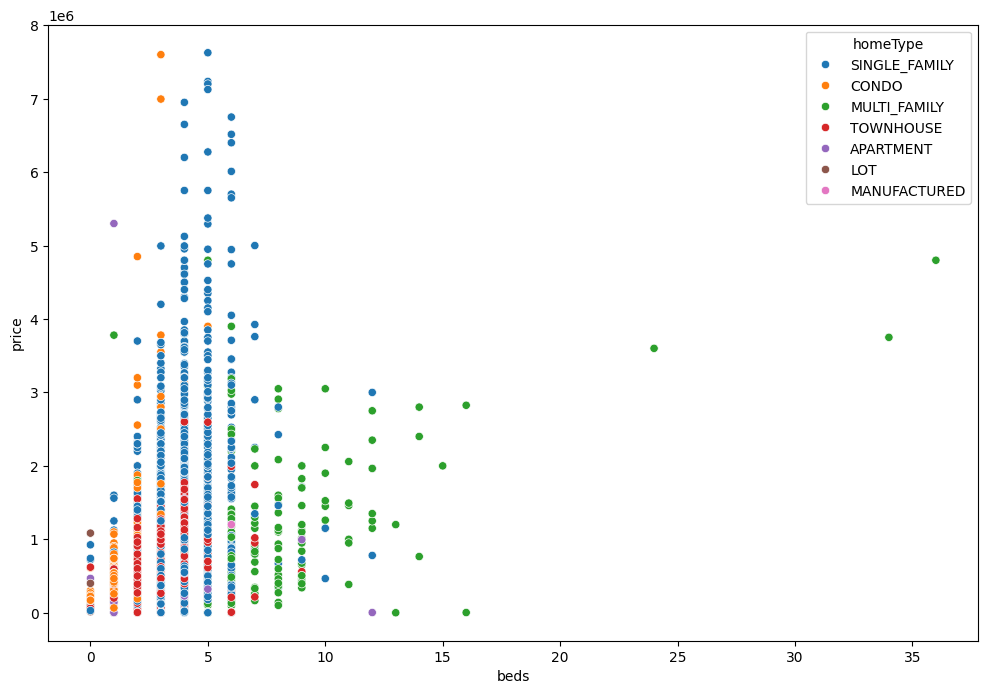

In [13]:
fig=plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="beds",y="price",hue="homeType")

<Axes: xlabel='baths', ylabel='price'>

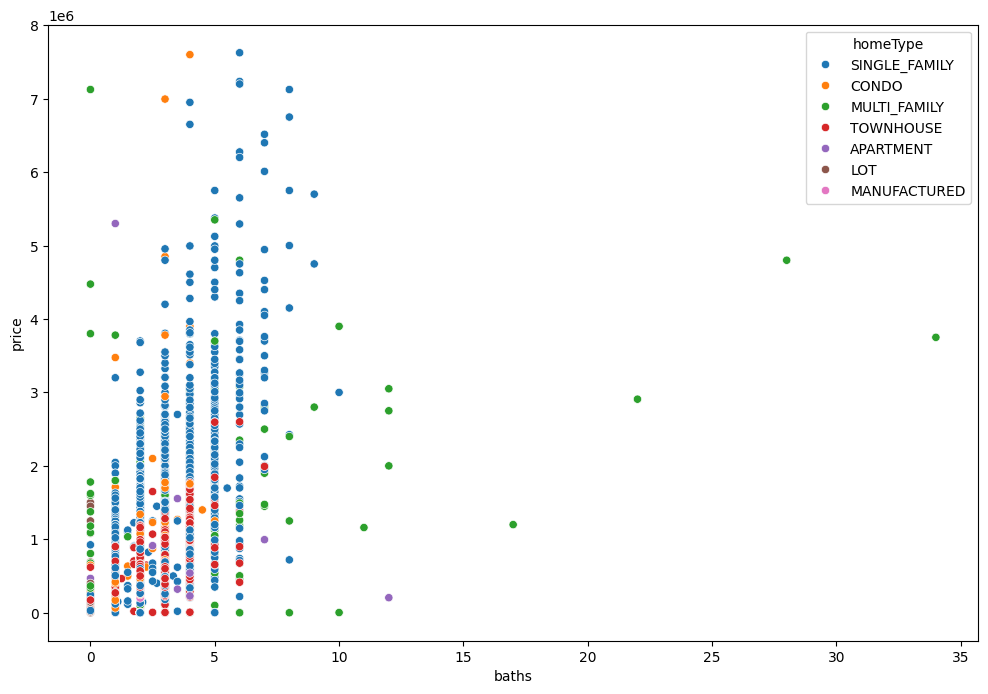

In [14]:
fig=plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="baths",y="price",hue="homeType")

<Axes: xlabel='area', ylabel='price'>

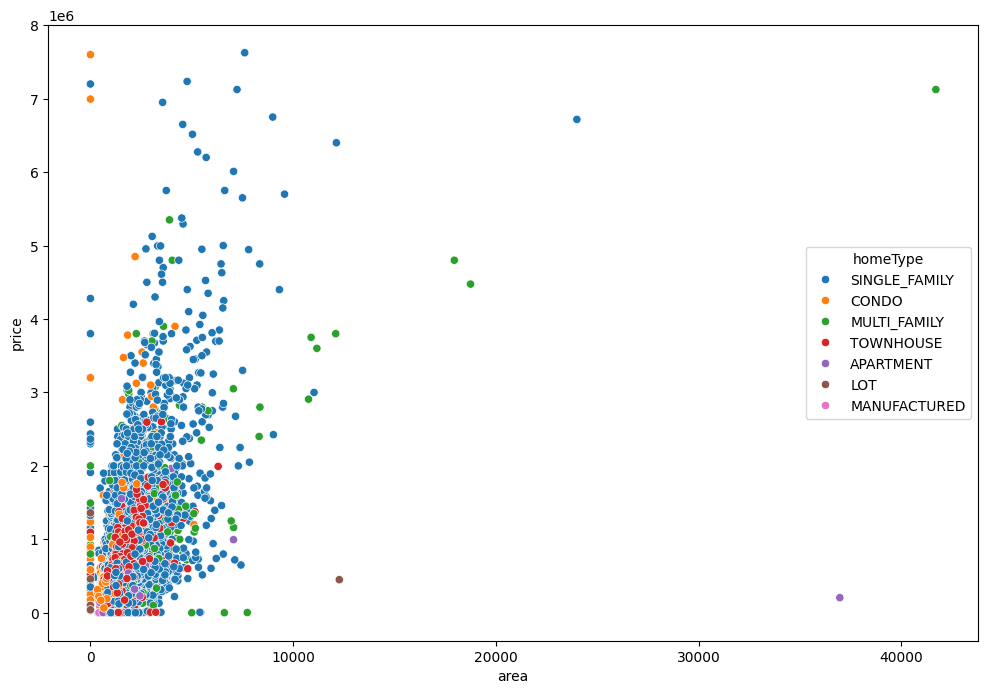

In [15]:
fig=plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="area",y="price",hue="homeType")

<Axes: xlabel='hasAdditionalAttributions', ylabel='price'>

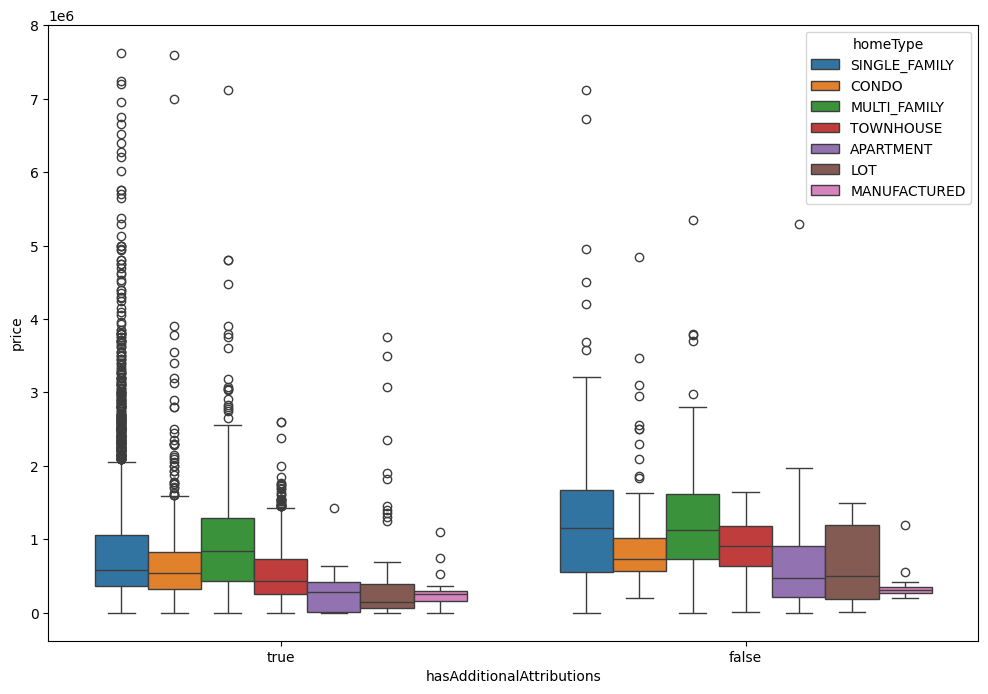

In [16]:
fig=plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="hasAdditionalAttributions",y="price",hue="homeType")

C:\Users\Vijay Krishnan\AppData\Local\Temp\ipykernel_11848\948924321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="area", y="homeType", palette="husl")


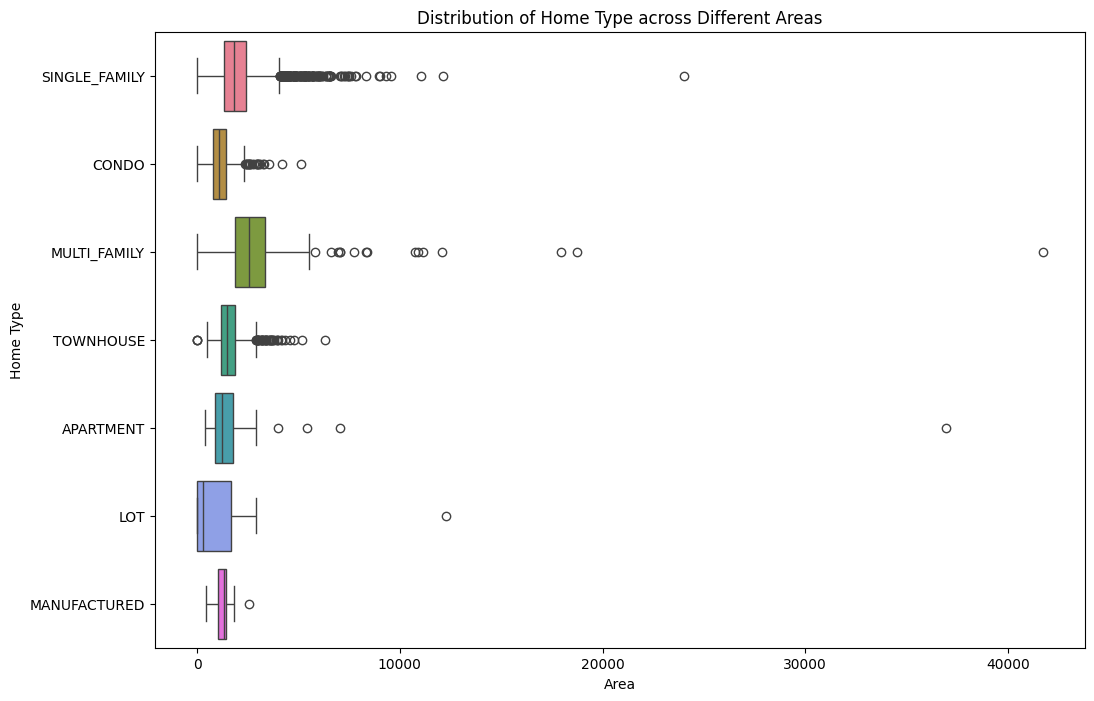

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="area", y="homeType", palette="husl")
plt.xlabel('Area')
plt.ylabel('Home Type')
plt.title('Distribution of Home Type across Different Areas')
plt.show()

# Inference the above multivariate graphs
- We discussed earlier why more number of bedrooms and bathrooms doesnt necessarily mean increased price, Here is why:
- As we can see from graph Multi Family houses have more number of bedrooms and bathrooms but doesnt increase the price since it is normal for a multi family house to have multiple bed and bathrooms.
- Likewise we discussed earlier about Area=0. Area=0 means the houses which shares walls like Condos and Lots.
- Except for Multi Family houses, Additional attributions have impact on house prices. And we can say having additional attributions doesnt gurantee increased house prices.
- Multi family houses take up a lot of area, and we have observed Area's linear relationship with price earlier. And Lots have the least area distribution.


Text(0.5, 1.0, 'Price vs. Area for Apartment, Condo, and Lot')

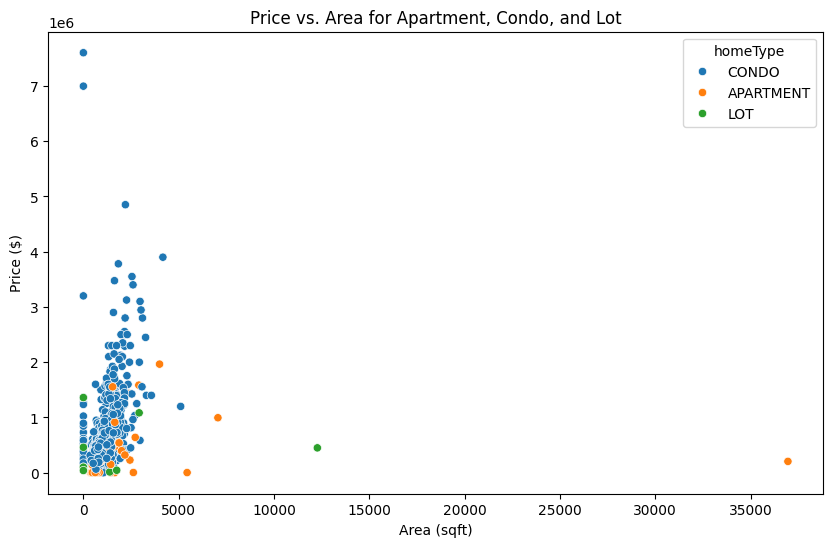

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df[df["homeType"].isin(["APARTMENT","CONDO","LOT"])],x='area', y='price', hue='homeType')
plt.xlabel('Area (sqft)')
plt.ylabel('Price ($)')
plt.title('Price vs. Area for Apartment, Condo, and Lot')

- We have taken 3 structurally similair house types: Apartment,Condo and Lots
- Apartments are not zero area houses while, zero area houses are Lot and Condo are mostly(inverse need not be true)
- Apartments tend to increase in area size the most. While Condo have that behaviour a little. In most cases Area does'nt affect the prices of Lot.

In [33]:
px.scatter(df.loc[df['city'].isin(['Denver','Indianapolis','San Jose',"Chicago","Philadelphia"])],x='area',y='price',color='city',hover_name='city')


#Interesting inference of above plot:
- Price need not be linearly increasing with Area for every city.
- Different behaviour of Chicago